Python에서 Keras를 활용한 딥러닝 강의
- Skin cancer classification


  실습자료 다운로드: **http://www.snubi.org/~deep/data.zip**


Skin melanoma vs Bowen's disease

#tensorflow, keras, opencv-python, pillow, scikit-lot, matplotlib 등 라이브러리 설치 필요



https://www.python.org/ftp/python/3.6.7/python-3.6.7-amd64.exe

- python -m pip install --upgrade pip


- pip install ipython

- pip install notebook


- pip install tensorflow

- pip install keras


- pip install opencv-python

- pip install pillow

- pip install scikit-plot

- pip install matplotlib

- pip install pandas

In [2]:
#python -m pip install --upgrade pip
#pip install ipython

#pip install notebook

#pip install tensorflow

#pip install keras

#pip install opencv-python

#pip install pillow

!pip install scikit-plot

#pip install matplotlib

#pip install pandas

In [0]:
import tensorflow as tf
import numpy as np
import keras
import cv2
import os


import scikitplot as skplt
import matplotlib.pyplot as plt

In [0]:


from keras import models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.pooling import AveragePooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

import keras.backend as K
from keras.optimizers import SGD
from keras.models import Model

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import pandas as pd

*Batch size*는 CPU 혹은 GPU에 한번의 학습에 들어갈 Queue에 이미지의 수.

높을수록 효율적이지만, GPU의 메모리를 고려해서 선정해야함.


*epoch*는 전체 Training를 한번씩 학습하는 것을 의미한다.

따라서 epoch의 수는 전체 데이터를 몇번 학습할지에 대한 횟수를 의미


*Learning Rate*는 Back-propagation에서 Error를 줄이는 방향으로 Weight를 수정할 때,

얼마나 큰 수정을 가할것이냐에 대한 수치


*Decay*는 Learning rate의 update값.

학습할수록 점점 작은 Learning rate가 필요.


*img_width, img_height는 학습된 Neural network 구조에 동일한 input size가 필요하다.

보통 224를 많이 사용한다.

In [0]:
def baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(3, input_dim=3, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    #Compile model
    
    model.compile(loss = 'mean_squared_error', optimizer='adam')
    return model

기본 baseline_model은 입력층으로 3개의 데이터를 받아, 3개 뉴런의 Hidden layer를 가지고,

출력층은 하나의 값만을 출력하는 기본 Linear function이다.

In [0]:
x_train = np.array([[1,2,3], [3,4,1], [2,6,2], [4,3,1], [6,5,4]])
y_train = np.array([7, 9, 11, 9, 16])

x_test = np.array([[1,1,1], [2,2,2]])

training 데이터와, 결과값을 저장한다.

예제로 사용하는 데이터는 y = x+1 함수의 linear function이므로,

y_train 값은 x_train의 list에 해당하는 숫자의 합 +1로 구성하였다.

In [7]:
model = baseline_model()
history = model.fit(x_train, y_train, batch_size=1000, epochs = 2000)

model.predict(x_test)








Epoch 1/2000





5/5 [==============================] - 10s 2s/step - loss: 117.6000
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 117.6000
Epoch 3/2000
5/5 [==============================] - 0s 1ms/step - loss: 117.6000
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 117.6000
Epoch 5/2000
5/5 [==============================] - 0s 499us/step - loss: 117.6000
Epoch 6/2000
5/5 [==============================] - 0s 795us/step - loss: 117.6000
Epoch 7/2000
5/5 [==============================] - 0s 850us/step - loss: 117.6000
Epoch 8/2000
5/5 [==============================] - 0s 853us/step - loss: 117.6000
Epoch 9/2000
5/5 [==============================] - 0s 576us/step - loss: 117.6000
Epoch 10/2000
5/5 [==============================] - 0s 1ms/step - loss: 117.6000
Epoch 11/2000
5/5 [==============================] - 0s 620us/step - loss: 117.6000
Epoch 12/2000
5/5 [==============================] - 0s 462us/step - loss: 117.6000

array([[0.],
       [0.]], dtype=float32)

학습되는 과정을 loss값을 통해 확인한다.

loss는 mean_squared_error, 최소제곱평균으로 정의했으므로 얼마나 y_train값에 근접하느냐를 뜻한다.

In [8]:
model.predict(x_test)

array([[0.],
       [0.]], dtype=float32)

[1, 1, 1], [2, 2, 2]를 test데이터로 사용하였으므로, 4와 7이 나올것으로 기대할 수 있다.

In [0]:
batch_size = 15
epochs = 300
LearningRate = 1e-3
Decay = 1e-6
img_width = 224
img_height = 224

학습에 사용될 데이터의 위치를 알린다.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 새 섹션

# 새 섹션

In [0]:
CurrentDirectory = "drive/My Drive/SNUBI/python_seminar/data (1)/"

train_directory = CurrentDirectory + 'TRAIN/'
test_directory	= CurrentDirectory + 'TEST/'
model_directory = CurrentDirectory + 'MODEL/'
tensorboard_directory = CurrentDirectory + 'Tensorboard'

Convolutional Neural Network 알고리즘들 중, 대표적인 VGG16 모델의 구성요소를 직접 구현한다.


In [0]:
def VGG_16():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Conv2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))
	
	#top layer of the VGG net
	return model

Binary classification을 구현하는 것으로, 최종 Fully connected layer의 units를 2로 설정한다.

GlobalAveragePooling2D 는 최종적으로 Classification 이후, Attention Heatmap을 그리기 위한 Layer이다.

softmax는 Sigmoid function의 general한 함수.

momentum은 Learning rate에 의한 Gradient Descent의 방향성에 관성을 주는것. (너무 와리가리 하면 local minimum에 빠지기 쉬움)

In [0]:
vggModel = VGG_16()
x = GlobalAveragePooling2D()(vggModel.output)
predictions = Dense(2, activation='softmax')(x)
DeepLearning = Model(inputs=vggModel.input, outputs=predictions)

DeepLearning.compile(optimizer=SGD(lr=LearningRate,decay=Decay,
	momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['acc'])

Keras에서 Generator는 자동으로 Data를 load해주는 역할을 함.

데이터를 불러올 때, 이미지를 자동으로 전처리 하는 코드를 Argument로 삽입할 수 있음

- Rescale: [0-255] 데이터를 [0-1] scale로 변환
- rotation_range: 이미지를 각도를 돌려가면서 학습시켜줄 수 있음
- shift_range: 이미지를 shift
- shear_range: 이미지에 왜곡을 줌
- zoom_rnage: 이미지를 확대
- flip: 뒤집기
- featurewise_center, std_normalization: 이미지 분포 변환
- data_format: RGB 3채널은 데이터의 마지막에 들어감. ex) [224, 224, 3]

In [0]:
DATAGEN = ImageDataGenerator(
	rescale=1./255,
	rotation_range=20,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	zoom_range=0.2, 
	horizontal_flip=True,
	vertical_flip=True,
	featurewise_center=True,
	featurewise_std_normalization=True,
	data_format="channels_last")

In [0]:
#asd

In [0]:
DATAGEN_TEST = ImageDataGenerator(
	rescale=1./255,
	featurewise_center=True,
	featurewise_std_normalization=True,
	data_format="channels_last")

Test 데이터 용으로 Generator를 생성.

모델의 성능을 판단할 Test dataset은 Augmentation을 수행하면 안됨.

In [29]:
TRAIN_GENERATOR = DATAGEN.flow_from_directory(
	train_directory,
	target_size = (img_width, img_height),
	batch_size = batch_size,
	class_mode='categorical')

TEST_GENERATOR = DATAGEN_TEST.flow_from_directory(
	test_directory,
	target_size = (img_width, img_height),
	batch_size = batch_size,
	shuffle = False,
	class_mode='categorical')

Found 540 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


540개의 이미지가 Training data로 읽혀짐

60개의 이미지가 Test data로 읽혀짐.

단 Augmentation은 Training data에만 적용

In [0]:
CP = ModelCheckpoint(filepath=model_directory+
					'-{epoch:03d}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
					monitor='val_acc', verbose=1, save_best_only=True, mode='max')
TB = TensorBoard(log_dir=tensorboard_directory, write_graph=True, write_images=True)
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)
CALLBACK = [CP, TB, LR]

ModelCheckpoint는 학습을 진행하면서 생성된 모델의 weight를 저장함

TensorBoard는 학습의 진행사항에 대한 log와 모델의 정보를 보는 기능

LearningRate를 자동으로 수정해주는 Plateau


위 3가지를 학습하면서 자동으로 실행하여, 매 학습마다 저장해주는 기능을 CallBack이라고 함.

In [31]:
DeepLearning.fit_generator(
	TRAIN_GENERATOR,
	steps_per_epoch=3,
	epochs=200,
	callbacks=CALLBACK,
	shuffle=True,
	validation_data=TEST_GENERATOR,
	validation_steps=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3/3 [==============================] - 15s 5s/step - loss: 0.6931 - acc: 0.5333 - val_loss: 0.6921 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to drive/My Drive/SNUBI/python_seminar/data (1)/MODEL/-001-0.6921-1.0000.hdf5

Epoch 2/200
3/3 [==============================] - 11s 4s/step - loss: 0.6933 - acc: 0.3556 - val_loss: 0.6947 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/200
3/3 [==============================] - 12s 4s/step - loss: 0.6935 - acc: 0.4667 - val_loss: 0.6896 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/200
3/3 [==============================] - 10s 3s/step - loss: 0.6929 - acc: 0.5333 - val_loss: 0.6881 - val_acc: 1.0000

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/200
3/3 [==============================] - 10s 3s/step - loss: 0.6937 - acc: 0.4444 - val_loss: 0.6976 - val_acc: 0.0000e+00

Epoch 00005: val_acc did not improve from 1.00000
Epoch 6/20

실제 학습의 진행..

딥러닝 모델의 이미지 학습 (Training)을 진행하고,

Epoch마다 Validation set에 대해 평가를 함.

**CPU 버전으로는 매우 느리므로 실행 주의**
**딥러닝 학습용 GPU가 필요

In [0]:
DeepLearning.load_weights(model_directory+'PretrainedVGG.hdf5')

제 연구실에서 위의 코드로 학습한 모델의 Weight를 제공해드립니다.

In [33]:
DeepLearning.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14_input (Inp (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 114, 114, 64)      0   

VGG 모델의 summary

In [34]:
test_pred=DeepLearning.predict_generator(TEST_GENERATOR,verbose=1, steps=4)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 1s 227ms/step


In [35]:
Akiec = [(test_pred[i][1]) for i in range(0,30)]
Melanoma = [(test_pred[i][1]) for i in range(30,60)]

for Result_Akiec, Result_Mela in zip(Akiec, Melanoma):
    print([Result_Akiec, Result_Mela])

[0.010010782, 0.9438011]
[0.09738692, 0.99587065]
[0.18956165, 0.9936301]
[0.03849322, 0.9005278]
[0.043104827, 0.99314535]
[0.16161136, 0.9131012]
[0.10451101, 0.9974694]
[0.048163738, 0.95566344]
[0.010808472, 0.61346537]
[0.0041364664, 0.644243]
[0.012942117, 0.8873491]
[0.014121742, 0.9467814]
[0.09058328, 0.9002652]
[0.026563067, 0.34277982]
[0.4289438, 0.9785095]
[0.2007183, 0.99846077]
[0.14629695, 0.96562696]
[0.029689996, 0.96318716]
[0.004120451, 0.79554874]
[0.020713726, 0.99116194]
[0.028662862, 0.99124384]
[0.045290355, 0.99523073]
[0.2803001, 0.96848005]
[0.37904364, 0.9978695]
[0.035114948, 0.993612]
[0.0048168013, 0.9997212]
[0.010178826, 0.73693013]
[0.103977725, 0.9971119]
[0.036909115, 0.98185825]
[0.011131993, 0.92938286]


모델 예측 결과.

- 좌측: Akiec
- 우측: Melanoma

Akiec은 0에 가깝게, Melanoma는 1에 가깝게 잘 예측.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


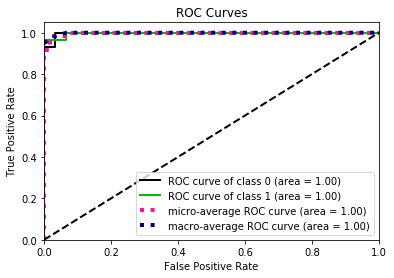

In [36]:
Labels = np.array([0, 1])
y_true = np.repeat(Labels, [30, 30], axis=0)
pred = test_pred[:,0]

skplt.metrics.plot_roc_curve(y_true, test_pred)
plt.show()

그려진 ROC Curve.

0은 Akiec, 1은 Melanoma를 의미.

Skin classification은 딥러닝이 해결할 수 있는 매우 좋은 예제로,

성능이 아주 좋은것을 확인할 수 있다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


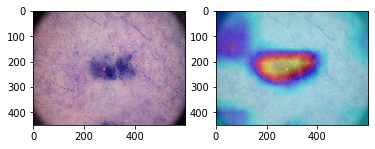

In [47]:
Files = os.listdir(test_directory+'melanoma')
for i in range(len(Files)):
	img_path = CurrentDirectory+"TEST/melanoma/"+Files[i]
	output_path = CurrentDirectory + 'Heatmap_' + Files[i]

	img = image.load_img(img_path, target_size=(224, 224))
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)

	x = preprocess_input(x)
	preds = DeepLearning.predict(x)

	argmax = np.argmax(preds[0])
	output = DeepLearning.output[:, argmax]
	last_conv_layer = DeepLearning.get_layer('conv2d_26')

	grads = K.gradients(output, last_conv_layer.output)[0]
	pooled_grads = K.mean(grads, axis=(0, 1, 2))
	iterate = K.function([DeepLearning.input], [pooled_grads, last_conv_layer.output[0]])
	pooled_grads_value, conv_layer_output_value = iterate([x])

	for i in range(512):
		conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
	heatmap = np.mean(conv_layer_output_value, axis=-1)
	heatmap = np.maximum(heatmap, 0)
	heatmap /= np.max(heatmap)

	img = cv2.imread(img_path)
	heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
	heatmap = np.uint8(255 * heatmap)
	heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
	hif = .8
	superimposed_img = heatmap * hif+ img

	ax = plt.subplot(1,2,1)
	ax.imshow(img)
	ax = plt.subplot(1,2,2)
	ax.imshow(img)
	ax.imshow(255-heatmap, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest')
	plt.savefig(output_path, bbox_inches = 'tight')


그려진 Heatmap은 빨갛게 그려진 부분이 예측할때 주요하게 사용된 Feature map의 GAP 결과라고 해석할 수 있다.